## Machine learning code for Yield Surface model

In this Jupyter notebook a complete machine learning pipeline is developed for data obtained for Yield surface equation
of the form:

\begin{equation}
F = \left(   \frac{H}{h_{0}V_{f}F_{v1}}   \right)^{2} +  \left(   \frac{M}{m_{0}V_{f}BF_{v2}}   \right)^{2} + 2e\frac{H}{h_{0}V_{f}F_{v1}} \frac{M}{m_{0}V_{f}BF_{v2}} - 1 = 0 
\end{equation}

where 

\begin{equation}
\begin{split}
F_{v1}(V,V_{t},V_{0}) = \beta_{12}\left( \frac{V}{V_{f}} + t_{0}  \right)^{\beta_{1}} \left(1 - \frac{V}{V_{f}} \right)^{\beta_{2}} \\
F_{v2}(V,V_{t},V_{0}) = \beta_{34}\left( \frac{V}{V_{f}} + t_{0}  \right)^{\beta_{3}} \left(1 - \frac{V}{V_{f}} \right)^{\beta_{4}}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\beta_{12} = \frac{(\beta_{1} + \beta_{2})^{(\beta_{1} + \beta_{2})}}{\beta_{1}^{\beta_{1}} \beta_{2}^{\beta_{2}}} \\
\beta_{34} = \frac{(\beta_{3} + \beta_{4})^{(\beta_{3} + \beta_{4})}}{\beta_{3}^{\beta_{3}} \beta_{4}^{\beta_{4}}}
\end{split}
\end{equation}




The data obtained represent the values calibrated for constants $\beta_{1}$, $\beta_{2}$, $h_{0}$, $\beta_{3}$, $\beta_{4}$, $m_{0}$, $e$ and $t_{0}$.


### Variable description


$\beta_{1}$ : This variable represents a coefficient that controls the shape of the Yield surface equation presented before.

First, we started by loading the packages and data that we're going to use:


In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.feature_selection
import numpy as np

# Set seaborn nice looking parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


input_df = pd.read_csv("X_t.csv", names=["cohesion","phi","delta","hdf","dfb"])
output_df= pd.read_csv("vars_total_new.csv", names=["beta1","beta2","h0","beta3","beta4","m0","ecc","t0","Ca"])

output_df["ecc"] = output_df["ecc"]*2

We print out the first elements to ensure that importing is ok

In [15]:
input_df.head()

,cohesion,phi,delta,hdf,dfb
0,29.850032,24.351194,0.733783,0.425673,0.547926
1,17.196859,22.761617,0.324194,0.300265,1.524809
2,12.941870,43.855636,0.672340,0.137547,2.328534
3,13.753344,20.116400,0.667797,0.220674,1.399620
4,22.372520,37.908908,0.807733,0.401733,1.181919


In [16]:
output_df.head()

,beta1,beta2,h0,beta3,beta4,m0,ecc,t0,Ca
0,0.685752,0.749457,0.221806,1.000000,0.690667,0.145570,-0.109518,0.0989,0.089720
1,0.583948,0.655539,0.229212,0.959122,0.677672,0.165681,-0.329778,0.1200,0.154580
2,0.604276,0.802717,0.158832,0.979537,0.752889,0.152055,-0.249601,0.0174,0.040654
3,0.694640,0.738275,0.263765,0.969166,0.656404,0.157750,-0.156457,0.1600,0.158109
4,0.548732,0.680978,0.172147,0.876019,0.675111,0.154110,-0.349760,0.0245,0.046262


We proceed to visualize the potential relation that can exist between our input and output variables

<Axes: >

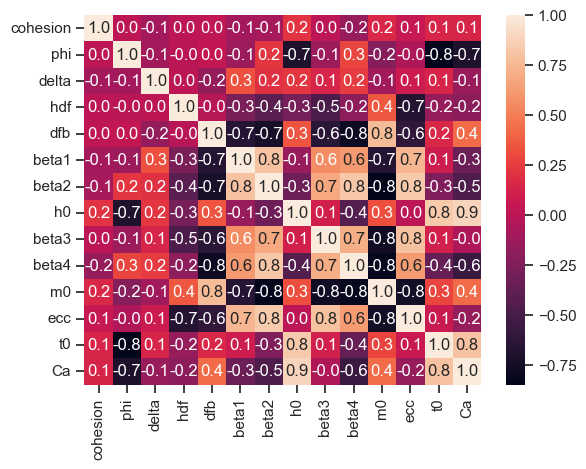

In [17]:
total_df = pd.concat([input_df, output_df], axis= 1) 
sns.heatmap(total_df.corr(), annot=True ,fmt=".1f")

From the plot, it is observed that results values are highly correlated. 
The most influential values are geometric properties $H/D_{f}$, $D_{f}/B$, and friction angle $\phi$.

Next, we use a F-test to determine which input values dominate the response

e:\Trade\TradeEnv2\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


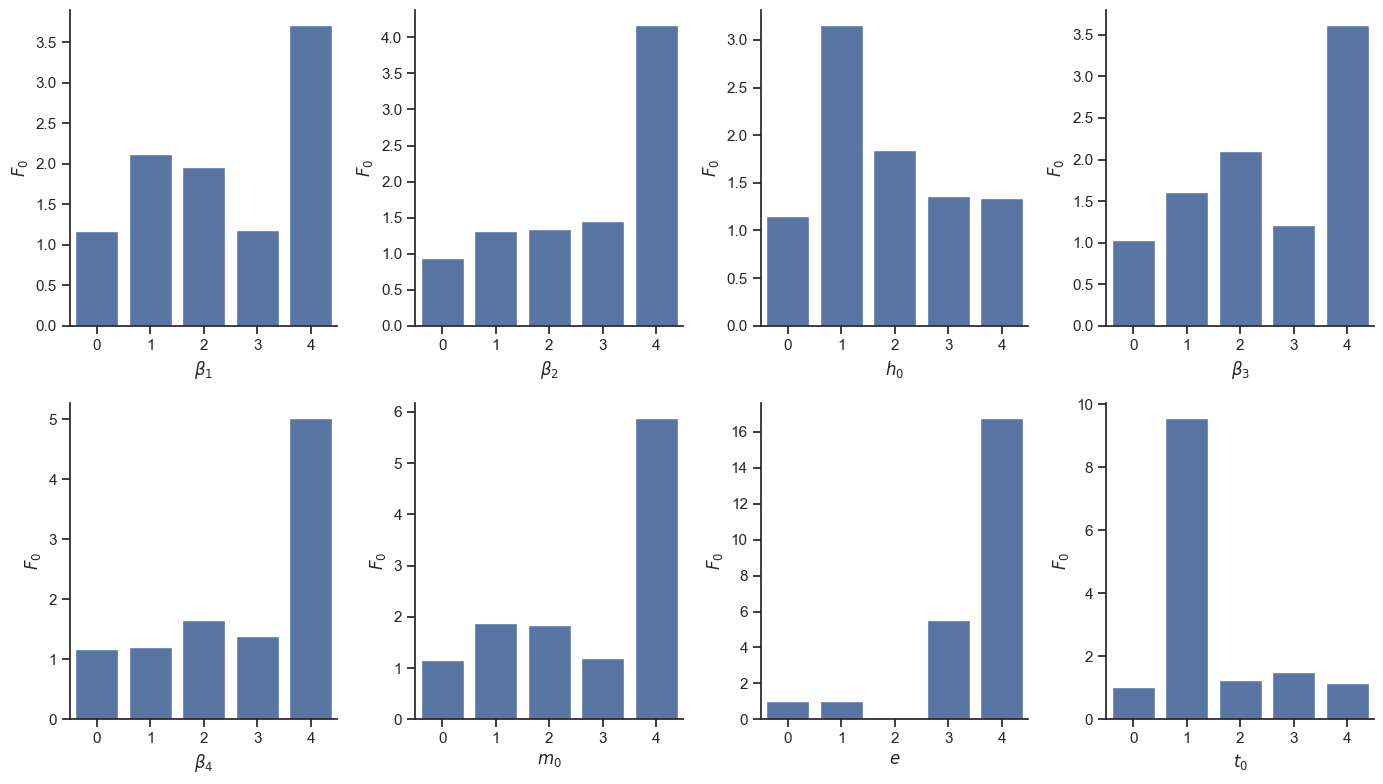

In [101]:
fig, axs = plt.subplots(2,4,figsize = (14,8))

axs = axs.ravel()
axes_letter = [r"$\beta_{1}$", r"$\beta_{2}$" , r"$h_0$" , r"$\beta_{3}$" ,r"$\beta_{4}$",
               r"$m_{0}$", r"$e$", r"$t_{0}$"]

for  i in range(0,8):
        f_test  = sklearn.feature_selection.f_classif(input_df, output_df.iloc[:,i])
        f_test  = pd.DataFrame({"F0_value" : f_test[0]})
        f_test.reset_index(inplace=True)
        ax = sns.barplot(x = f_test["index"] , y = f_test["F0_value"], ax= axs[i])
        ax.set(xlabel = axes_letter[i])
        ax.set(ylabel = r"$F_{0}$")

fig.tight_layout()

From the Figure it is observed that geometric constant $D_{f}/B$ is the most dominant value in 6/8 cases.

So, we proceed to visualize output data relation with $D_{f}/B$

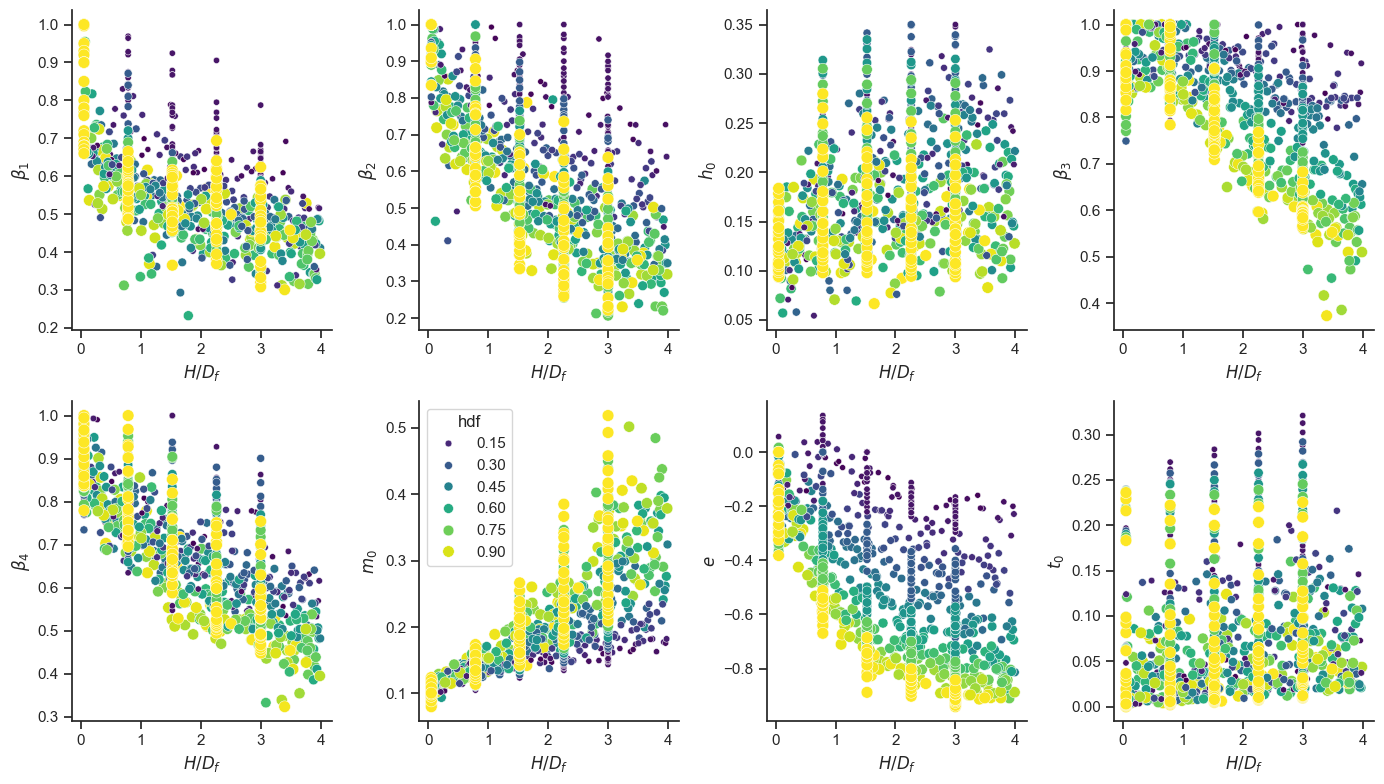

In [19]:
fig, axs = plt.subplots(2,4, figsize = (14,8))

axs = axs.ravel()
axes_letter = [r"$\beta_{1}$", r"$\beta_{2}$" , r"$h_0$" , r"$\beta_{3}$" ,r"$\beta_{4}$",
               r"$m_{0}$", r"$e$", r"$t_{0}$", r"$C_{a}$"]
legend_index = [False, False, False, False,False, True, False, False,False, False]

for  index, col_name in enumerate(output_df.columns[0:8]):
        ax = sns.scatterplot(x = input_df["dfb"] , y = output_df[col_name],
                             hue = input_df["hdf"], size =input_df["hdf"] , palette= "viridis",
                             ax= axs[index], legend= legend_index[index])
        ax.set(ylabel = axes_letter[index])
        ax.set(xlabel = r"$H/D_{f}$")


fig.tight_layout()

## Now we proceed to construct the neural network pipeline model

Import usefull packages for pipelines, scalers, grid_search for inspection and tensorflow components.

In [84]:
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

import joblib



In [85]:
# Define input as X and output as Y
X = input_df
Y = output_df

# Function to create keras neural network and use it in scikeras wrapper

def create_model(optimizer = "RMSprop", drop_rate = 0.1, neurons = 10, l1 = 0.01, l2 =0.01):
 # create model
    model = Sequential()

    model.add(Dense(neurons,input_dim = 5, activation='relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=l1, l2=l2)))
    # model.add(Dropout(drop_rate))
    model.add(Dense(neurons, activation='relu'))
    # model.add(Dropout(drop_rate))
    model.add(Dense(1))

    # Compile model
    model.compile(loss= "MAPE", optimizer= optimizer, metrics=['MSE'])
    return model


# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
callback = EarlyStopping(monitor='loss', patience=100)

# Definition of the keras wrapper model with callback for early stop
Ann_regressor = KerasRegressor(model=create_model, verbose=0, callbacks=[callback])

# Definition of pipeline
Reg_pipeline = Pipeline([
                        ("scale", QuantileTransformer()),
                        ("Regressor", Ann_regressor)])

In this case, for data scaling we choose "QuantileTransformer" as our input data X comes from a uniform distribution.

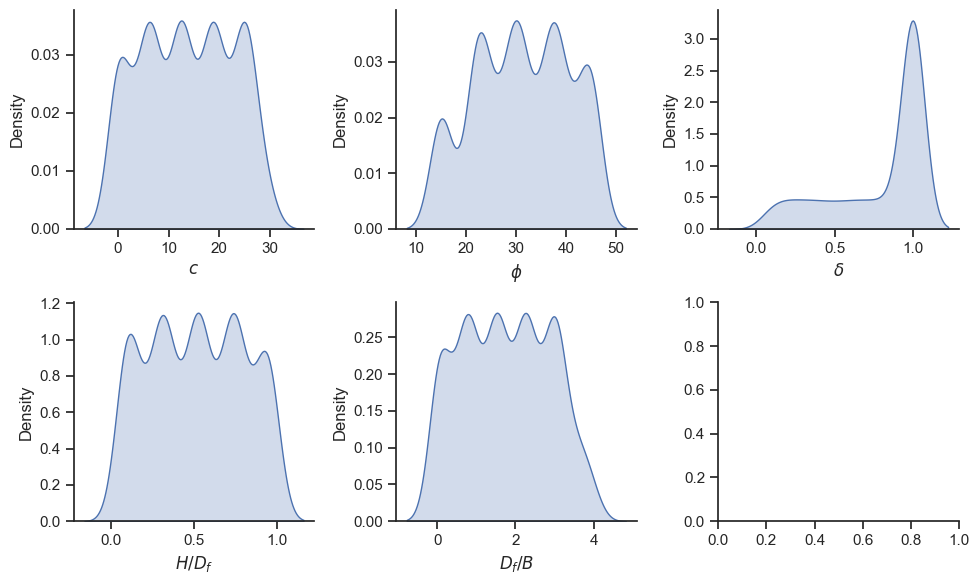

In [128]:
fig,axs = plt.subplots(2,3, figsize= (10,6))
axs = axs.ravel()
x_label_names = [r"$c$", r"$\phi$", r"$\delta$", r"$H/D_{f}$", r"$D_{f}/B$" ]
for index, col_name in enumerate(input_df.columns):
    ax = sns.kdeplot(input_df[col_name], fill = True , ax= axs[index])
    ax.set(xlabel = x_label_names[index])
fig.tight_layout()

We use grid_search to determine the best combination of parameters. In this case the parameters are already determined, but in case you need, just add more numbers or names to the vectors

Added parameters such as "neurons", "drop_rate" and "l1l2" represents: neurons of the model, the drop rate of neurons, and L1 and L2 value for regularization of input

In [86]:
batch_size = [20]
epochs = [500]
optimizer = ["RMSprop"]
validation_split = [0.2]
neurons = [64]
drop_rate = [0.2]
l1l2 = [0.03]

# Definition of input for grid_search in dictionary format

param_grid = dict(Regressor__batch_size=batch_size,
                  Regressor__epochs=epochs,
                  Regressor__optimizer = optimizer,
                  Regressor__model__drop_rate = drop_rate,
                  Regressor__model__neurons = neurons,
                  Regressor__model__l1 = l1l2,
                  Regressor__model__l2 = l1l2,
                  Regressor__validation_split = validation_split)

# Grid creation
grid = GridSearchCV(estimator=Reg_pipeline, param_grid=param_grid, n_jobs=-1, cv=10)


# We separate train and test data, so the model doesn't have data leaks
X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42)


# Grid fit to find the best model
# modelb1 = grid.fit(X,Y["beta1"])



Now we run it for every variable

In [ ]:

for col_names in Y.columns:

    model = grid.fit(X_train,y_train[col_names])

    # Generate the pipeline name:
    namesp=  "model_" + col_names + "_pipeline.pkl"

    # Finally, save the pipeline:

    joblib.dump(model.best_estimator_, namesp)

    del model


How to load the pipeline model

In [88]:
# Load the pipeline first:
pipeline = joblib.load('sklearn_pipeline.pkl')

Now we load every fitted model

0.8616548081069906
0.9400103129450738
0.9685878583841434
0.9263689140892936
0.9076706905670289
0.9808268594867561
0.9450350513706917
0.9917353420057166


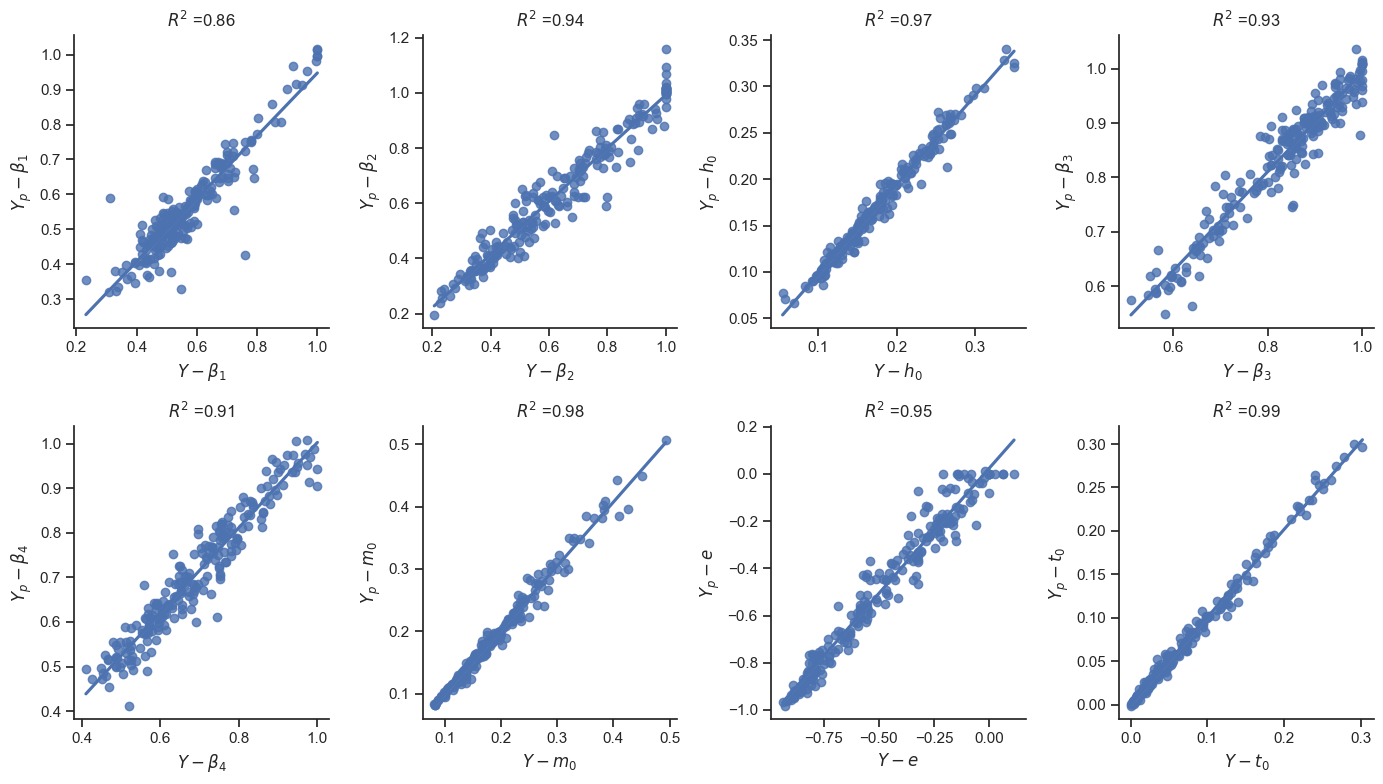

In [102]:
# Load the pipeline first:

Y = y_test
X = X_test


fig, axs = plt.subplots(2,4, figsize = (14,8))

axs = axs.ravel()


for index, col_names in enumerate(Y.columns[0:8]):


    namesp=  "model_" + col_names + "_pipeline.pkl"
    model = joblib.load(namesp)


    print(r2_score(Y[col_names] , model.predict(X)))
    ax = sns.regplot(x= Y[col_names], y = model.predict(X), ci=0.05, ax=axs[index])
    ax.set_xlabel(r"$Y-$" + axes_letter[index])
    ax.set_ylabel(r"$Y_{p}-$" + axes_letter[index])
    ax.set_title("$R^2$ =" + str('{0:.2f}'.format(r2_score(Y[col_names] , model.predict(X))))
                )

fig.tight_layout()

Now we proceed to do the same with XGBoost to test another algorithm

First, we setup the grid_search parameters, here the selected parameters are already calculated:

In [112]:
import xgboost as xgb

# X_train, X_test, y_train, y_test = train_test_split(input_df, output_df["beta1"], test_size=0.2, random_state=42)

Reg_pipeline = Pipeline([
                        ("scale", QuantileTransformer()),
                        ("Regressor", xgb.XGBRegressor())])

# model = Reg_pipeline.fit(X,Y["beta1"])
param_grid = {"Regressor__n_estimators":[20],
              "Regressor__reg_alpha" : [0.01],
              "Regressor__reg_lambda" : [0.08],
              "Regressor__eval_metric" : ["rmse"],
              "Regressor__max_depth" : [6],
              "Regressor__eta" : [0.3],
              "Regressor__seed" : [0]}


# Grid creation
grid = GridSearchCV(estimator=Reg_pipeline, param_grid=param_grid, n_jobs=-1, cv=10)
# grid.fit(X_train, y_train["beta1"])


$R^2$ coefficient calculation between $y$ and $y_{pred}$

In [ ]:
# r2_score(y_test,grid.best_estimator_.predict(X_test))


# Tree plotting in case you need it 

# fig, ax = plt.subplots(figsize=(300, 300))
# xgb.plot_tree(grid.best_estimator_["Regressor"], num_trees=4, ax=ax)
# plt.show()

We run the model for every output variable and save the pipeline model


In [ ]:

for col_names in Y.columns:

    model = grid.fit(X_train,y_train[col_names])

    # Save the Keras model first:
    namesp=  "model_" + col_names + "_pipeline_xgb.pkl"
    
    joblib.dump(model.best_estimator_, namesp)

    del model

We load every model to test it accuracy against the test data that the model haven't seen

0.9030732946866402
0.9468871847428456
0.9693666317861078
0.9049488481882864
0.9082482625009333
0.9767901262589532
0.9869481892193933
0.9795956955218532


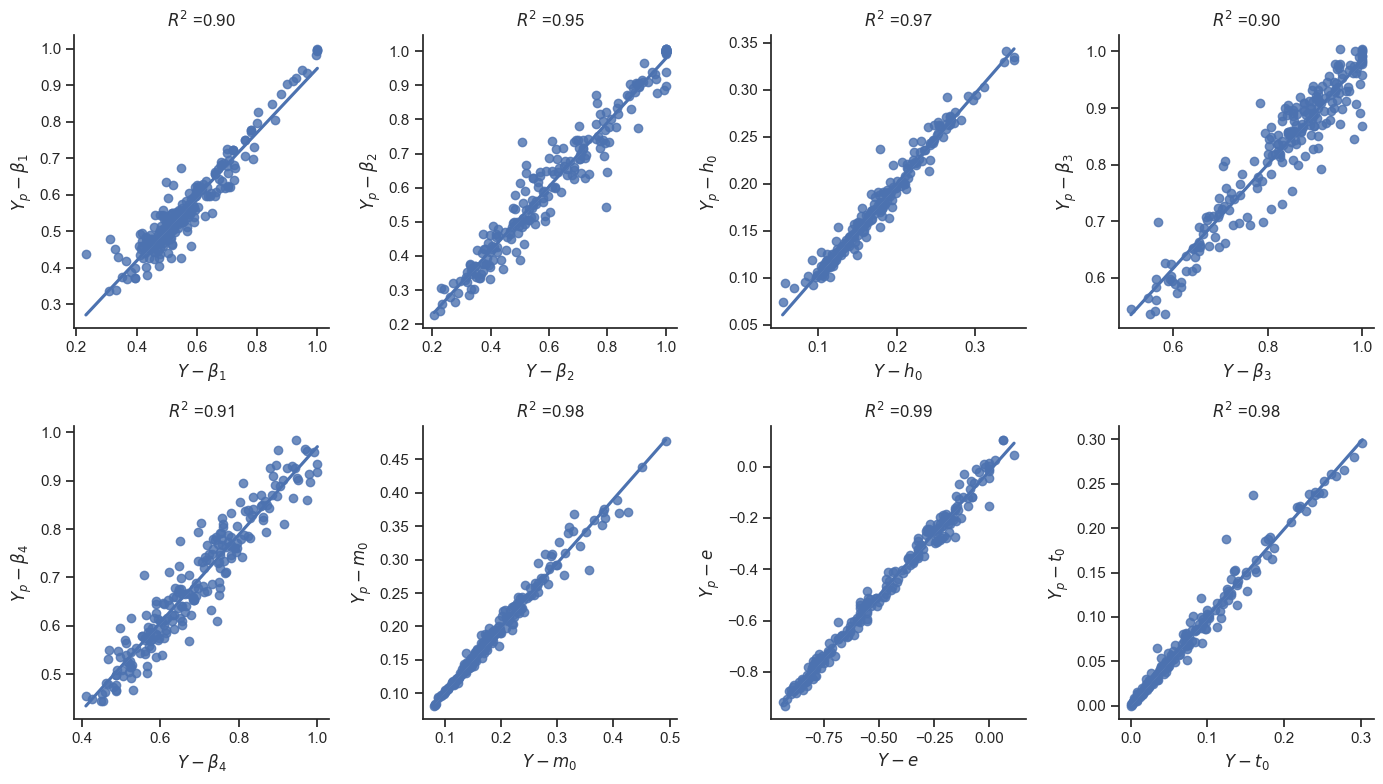

In [114]:
Y = y_test
X = X_test


fig, axs = plt.subplots(2,4, figsize = (14,8))

axs = axs.ravel()


for index, col_names in enumerate(Y.columns[0:8]):


    namesp=  "model_" + col_names + "_pipeline_xgb.pkl"
    model = joblib.load(namesp)


    print(r2_score(Y[col_names] , model.predict(X)))
    ax = sns.regplot(x= Y[col_names], y = model.predict(X), ci=0.05, ax=axs[index])
    ax.set_xlabel(r"$Y-$" + axes_letter[index])
    ax.set_ylabel(r"$Y_{p}-$" + axes_letter[index])
    ax.set_title("$R^2$ =" + str('{0:.2f}'.format(r2_score(Y[col_names] , model.predict(X))))
                )

fig.tight_layout()


In [129]:
!jupyter nbconvert --to html D:/WebPage/foundation_machine_learning/Foundation_data_ann.ipynb


[NbConvertApp] Converting notebook D:/WebPage/foundation_machine_learning/Foundation_data_ann.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1902015 bytes to D:\WebPage\foundation_machine_learning\Foundation_data_ann.html
